In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-mask-logo/youtube logo.jpg
/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-datase

In [2]:
#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py


# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/kaggle/input/youtube-trending-video-dataset/US_youtube_trending_data.csv")

In [4]:
data.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
data.shape# exploring the dataset size

(80791, 16)

In [6]:
data.info()#Exploring data types of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80791 entries, 0 to 80790
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           80791 non-null  object
 1   title              80791 non-null  object
 2   publishedAt        80791 non-null  object
 3   channelId          80791 non-null  object
 4   channelTitle       80791 non-null  object
 5   categoryId         80791 non-null  int64 
 6   trending_date      80791 non-null  object
 7   tags               80791 non-null  object
 8   view_count         80791 non-null  int64 
 9   likes              80791 non-null  int64 
 10  dislikes           80791 non-null  int64 
 11  comment_count      80791 non-null  int64 
 12  thumbnail_link     80791 non-null  object
 13  comments_disabled  80791 non-null  bool  
 14  ratings_disabled   80791 non-null  bool  
 15  description        79793 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [7]:
data.isna().sum()#Inspecting for null values in the dataset. 

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          998
dtype: int64

In [8]:
data=data.dropna()#dropping the null values.

In [9]:
data.shape

(79793, 16)

In [10]:
for i in data.columns:
    print(i+":",len(data[str(i)].value_counts()))
    print("-------------------------------------")

video_id: 13569
-------------------------------------
title: 13855
-------------------------------------
publishedAt: 13317
-------------------------------------
channelId: 3941
-------------------------------------
channelTitle: 3990
-------------------------------------
categoryId: 15
-------------------------------------
trending_date: 384
-------------------------------------
tags: 10658
-------------------------------------
view_count: 78626
-------------------------------------
likes: 64243
-------------------------------------
dislikes: 12124
-------------------------------------
comment_count: 24756
-------------------------------------
thumbnail_link: 13569
-------------------------------------
comments_disabled: 2
-------------------------------------
ratings_disabled: 2
-------------------------------------
description: 14514
-------------------------------------


In [11]:
data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [12]:
data["video_id"].value_counts()[:20]# we can clearly see that video_id's are repeated.
#Hence we will consdiered the video_id with most recent date as it contians cummulative comment and like count. 

hdmx71UjBXs    36
aONT7atzqfw    35
mcUpeaSX8BE    34
wY6UyatwVTA    34
vrRfBmMWpLY    33
pvPsJFRGleA    27
CZJvBfoHDk0    24
atUQb_8WsiE    23
0sgk1sNUJR8    23
rt-2cxAiPJk    19
ddlImQbD-sI    19
LH0CWJYgEaI    18
Ecy1FBdCRbQ    17
UF7hTMMeRv0    17
S2dRcipMCpw    17
ly6yEJSDFko    17
E6E22XQPhhg    17
M9SVC_lIpss    16
AhSl7uRrObw    16
-A1J8rzJp8E    16
Name: video_id, dtype: int64

In [13]:
#Converting the trending _date column to datetime column and creating new month and day columns.
data['trending_date']= pd. to_datetime(data['trending_date'])
data["month"]=pd. DatetimeIndex(data["trending_date"]).month
data["day"]=pd. DatetimeIndex(data["trending_date"]).day
data["week"]=pd. DatetimeIndex(data["trending_date"]).week

In [14]:
#Dropping redundant columns.
data=data.drop(columns=["thumbnail_link","channelId"],axis=1)

In [15]:
fdata=data.sort_values(by="trending_date").drop_duplicates(subset=["video_id"], keep="last")#just keeping lastest dated video id.

In [16]:
fdata.shape

(13569, 17)

In [17]:
fdata=fdata.sort_values(by=['view_count'],ascending=False)

top20views = fdata[:20]

fig = px.bar(top20views, x='channelTitle', y='view_count',color='view_count',
             hover_data=['view_count',"title"])

fig.update_xaxes(title_text='Channel title',title_font = {"size": 14},tickfont=dict(family='Rockwell', size=10))
fig.update_yaxes(title_text='View_count in Millions',title_font = {"size": 14},tickfont=dict(family='Rockwell', size=10))

fig.update_layout(title_text='View count by channel title')
fig.show()


In [18]:
cat_count=fdata.groupby("categoryId")["view_count"].mean()

fig = px.bar(cat_count, x=cat_count.index, y=cat_count.values ,color=cat_count.values)

fig.update_xaxes(title_text='Category Id',title_font = {"size": 14},tickfont=dict(family='Rockwell', size=10))
fig.update_yaxes(title_text='Average View Count',title_font = {"size": 14},tickfont=dict(family='Rockwell', size=10))

fig.update_layout(title_text='Average View count by Category id')
fig.show()

#### we can clearly see that category 10 has the highest average view count overall. 

In [19]:
fdata['publishedAt']= pd. to_datetime(fdata['publishedAt'])

fdata["Published_day"]=pd. DatetimeIndex(fdata["publishedAt"]).day
fdata["Published_week"]=pd. DatetimeIndex(fdata["publishedAt"]).week
fdata["Published_time"]=pd. DatetimeIndex(fdata["publishedAt"]).time
fdata["Published_weekday"]=pd. DatetimeIndex(fdata["publishedAt"]).weekday

### Relationship between published weekday and Views?

In [20]:
day_count=fdata.groupby("Published_weekday")["view_count"].mean()
color_code=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
fig = px.scatter(day_count, x=day_count.index, y=day_count.values, color=color_code,
                 color_discrete_sequence=px.colors.qualitative.Vivid,
                 size=day_count.values*10)


fig.update_xaxes(title_text='Weekdays',title_font = {"size": 14},tickfont=dict(family='Rockwell', size=10))
fig.update_yaxes(title_text='Average View Count',title_font = {"size": 14},tickfont=dict(family='Rockwell', size=10))

fig.update_layout(title_text='Average View count by Weekdays')

fig.show()

In [21]:
fdata.columns

Index(['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'month', 'day', 'week', 'Published_day', 'Published_week',
       'Published_time', 'Published_weekday'],
      dtype='object')

In [22]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

fdata['title'] = fdata.title.apply(lambda x: word_tokenize(x))
fdata['title'] = fdata.title.apply(lambda x: [w for w in x if w not in stop_words])
fdata['title'] = fdata.title.apply(lambda x: ' '.join(x))

fdata['tags'] = fdata.tags.apply(lambda x: word_tokenize(x))
fdata['tags'] = fdata.tags.apply(lambda x: [w for w in x if w not in stop_words])
fdata['tags'] = fdata.tags.apply(lambda x: ' '.join(x))

fdata['description'] = fdata.description.apply(lambda x: word_tokenize(x))
fdata['description'] = fdata.description.apply(lambda x: [w for w in x if w not in stop_words])
fdata['description'] = fdata.description.apply(lambda x: ' '.join(x))

In [23]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

Youtube = np.array(Image.open('../input/youtube-mask-logo/youtube logo.jpg'))

In [24]:
def WordCloudfunction(title,text):
    cloudtext=' '.join(fdata[text].tolist())
    sns.set(rc={'figure.figsize':(16,10)})
    wordcloud = WordCloud(mask=Youtube,background_color="white").generate(cloudtext)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(title,size=24)
    plt.show()

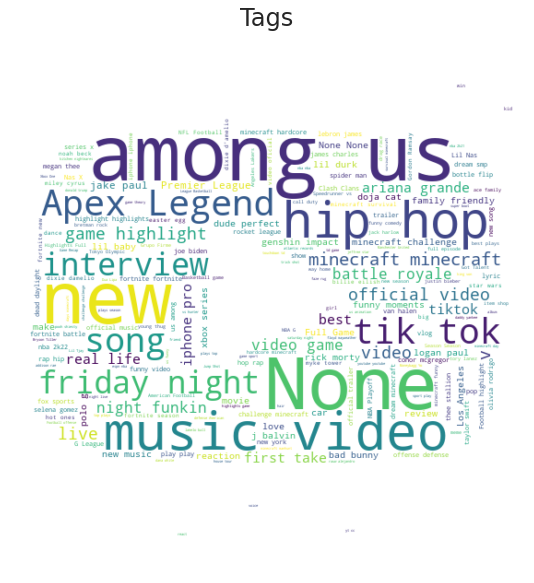

In [25]:
WordCloudfunction('Tags','tags')

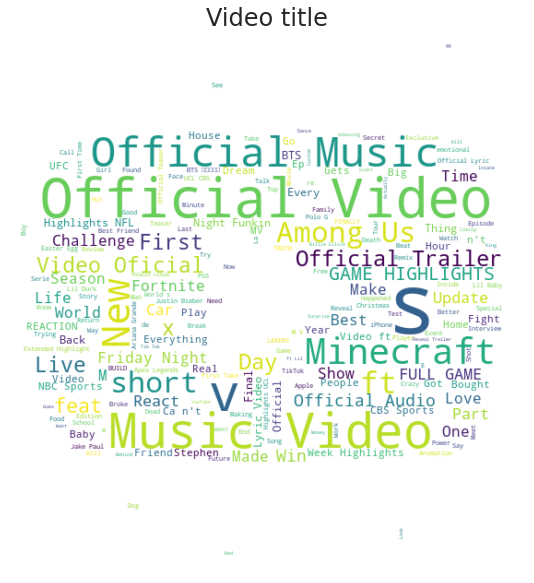

In [26]:
WordCloudfunction('Video title','title')

#### Official Music, Minecraft, Shorts, Fortnite, Challenge are most used title words by trending youtubers. 

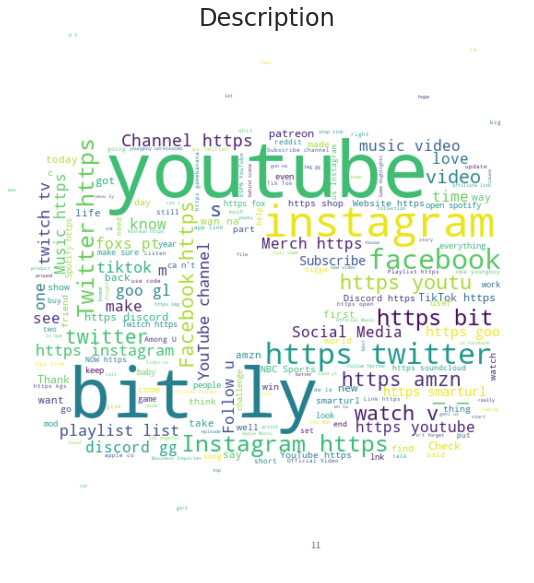

In [27]:
WordCloudfunction('Description','description')

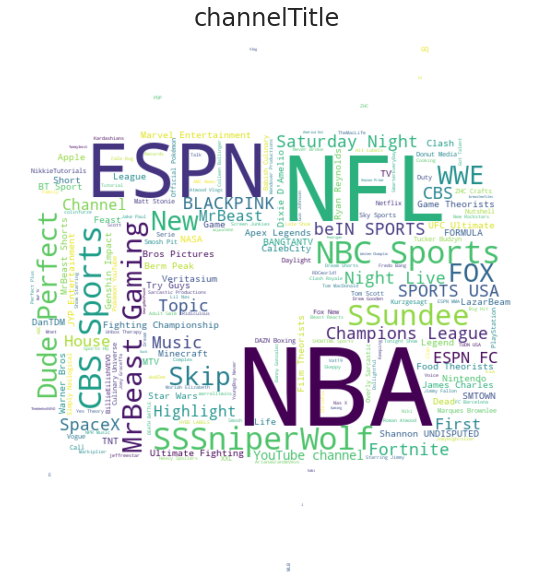

In [28]:
WordCloudfunction('channelTitle','channelTitle')

#### Sports, Music channels are on the top of trending list. 

In [29]:
Popular_words = ['tiktok','shorts','pranks',"news","sports","music","official","reallife"]

Popular_words_count = dict((x,0) for x in Popular_words)
for i in Popular_words_count:
    x = fdata['tags'].str.contains(i).sum()
    if i in Popular_words:
        Popular_words_count[i] = x
        
print(Popular_words_count)

{'tiktok': 417, 'shorts': 125, 'pranks': 98, 'news': 708, 'sports': 330, 'music': 1007, 'official': 562, 'reallife': 0}
